# Youtube Video Notebook

Grab canonical and youtube image.

The capture from Youtube is not the best, that's the point.

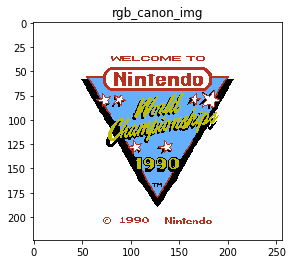

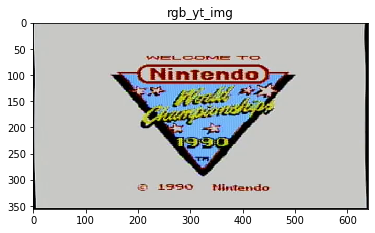

In [148]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

canon_img = cv2.imread('samples/snap_120.png')
yt_img = cv2.imread('samples/snap_40250_yt.png')

rgb_canon_img = cv2.cvtColor(canon_img, cv2.COLOR_BGR2RGB)
gray_canon_img = cv2.cvtColor(canon_img, cv2.COLOR_BGR2GRAY)

rgb_yt_img = cv2.cvtColor(yt_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_canon_img, cmap='Greys_r')
plt.title('rgb_canon_img')
plt.show()

plt.imshow(rgb_yt_img, cmap='Greys_r')
plt.title('rgb_yt_img')
plt.show()

Crop and resize

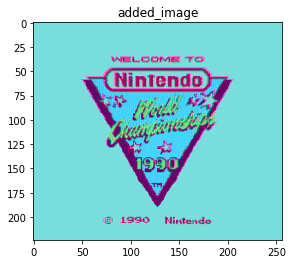

In [149]:
from skimage.measure import compare_ssim


cropped_rgb_yt_img = rgb_yt_img[10:345, 30:620]

resized_cropped_rgb_yt_img = cv2.resize(cropped_rgb_yt_img, (256, 224))

# plt.imshow(resized_cropped_rgb_yt_img, cmap='Greys_r')
# plt.title('resized_cropped_rgb_yt_img')
# plt.show()

_, canon_threshold = cv2.threshold(gray_canon_img,127,255,cv2.THRESH_BINARY)
canon_threshold_rgb = cv2.applyColorMap(canon_threshold, cv2.COLORMAP_SPRING)

added_image = cv2.addWeighted(canon_threshold_rgb,0.4,resized_cropped_rgb_yt_img,0.6,0)

plt.imshow(added_image, cmap='Greys_r')
plt.title('added_image')
plt.show()

# (score, diff) = compare_ssim(rgb_canon_img, resized_cropped_rgb_yt_img, multichannel=True, full=True)
# diff = (diff * 255).astype("uint8")
# print("SSIM: {}".format(score))

Minimized

Youtube video matching

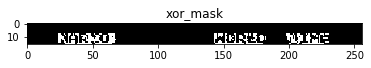

489


In [150]:
def hsv_image(path):
    img = cv2.imread(path)

    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def yt_resize(hsv_image):
    cropped_hsv_yt_img = hsv_image[12:350, 22:620]

    return cv2.resize(cropped_hsv_yt_img, (256, 224))


raw_mask = cv2.imread('masks/title_blue.png')
raw_greyscale_mask = cv2.cvtColor(raw_mask, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(raw_greyscale_mask, 10, 255, cv2.THRESH_BINARY)

resized_cropped_hsv_yt_img = yt_resize(hsv_image('samples/snap_40250_yt.png'))

lower_bound = np.array([100, 50, 50])
upper_bound = np.array([120, 255, 255])

blue_mask = cv2.inRange(resized_cropped_hsv_yt_img, lower_bound, upper_bound)
xor_mask = cv2.bitwise_xor(mask, blue_mask)
#
# plt.imshow(xor_mask, cmap='Greys_r')
# plt.title('xor_mask')
# plt.show()
# print(np.count_nonzero(xor_mask))

raw_mask = cv2.imread('masks/title_mario_raw.png')
raw_greyscale_mask = cv2.cvtColor(raw_mask, cv2.COLOR_BGR2GRAY)
# Crop mask to just the top
_, mask = cv2.threshold(raw_greyscale_mask, 10, 255, cv2.THRESH_BINARY)
mask = mask[0:16, 0:256]

lower_bound = np.array([0, 20, 180])
upper_bound = np.array([180, 140, 254])

yt_img = yt_resize(hsv_image('samples/snap_42959_yt.png'))[0:16, 0:256]

blue_mask = cv2.inRange(yt_img, lower_bound, upper_bound)
xor_mask = cv2.bitwise_xor(mask, blue_mask)

plt.imshow(xor_mask, cmap='Greys_r')
plt.title('xor_mask')
plt.show()
print(np.count_nonzero(xor_mask))

In [152]:
# Minimize

import itertools
import sys

def minimize(yl_range, yh_range, xl_range, xh_range):
    lowest_nonzero = sys.maxsize
    best_combo = None

    def hsv_image(path):
            img = cv2.imread(path)
            return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    raw_mask = cv2.imread('masks/title_mario_raw.png')
    raw_greyscale_mask = cv2.cvtColor(raw_mask, cv2.COLOR_BGR2GRAY)
    # Crop mask to just the top
    _, mask = cv2.threshold(raw_greyscale_mask, 10, 255, cv2.THRESH_BINARY)
    mask = mask[0:16, 0:256]
    lower_bound = np.array([0, 20, 180])
    upper_bound = np.array([180, 140, 254])
    yt_image_hsv = hsv_image('samples/snap_42959_yt.png')

    for yl, yh, xl, xh in itertools.product(yl_range, yh_range, xl_range, xh_range):

        def yt_resize(hsv_image):
            # cropped_hsv_yt_img = hsv_image[12:350, 22:620]
            cropped_hsv_yt_img = hsv_image[yl:yh, xl:xh]

            return cv2.resize(cropped_hsv_yt_img, (256, 224))

        yt_img = yt_resize(yt_image_hsv)[0:16, 0:256]

        blue_mask = cv2.inRange(yt_img, lower_bound, upper_bound)
        xor_mask = cv2.bitwise_xor(mask, blue_mask)
        count = np.count_nonzero(xor_mask)
        if count < lowest_nonzero:
            best_combo = (yl, yh, xl, xh)
            lowest_nonzero = count
            print(f"best_combo: {best_combo}, count: {count}")
    return best_combo

print(minimize(range(0, 50), range(300, 370), range(0, 50),range(500, 640) ))

best_combo: (0, 300, 0, 500), count: 1029
best_combo: (0, 300, 0, 502), count: 1027
best_combo: (0, 300, 0, 516), count: 1025
best_combo: (0, 300, 0, 522), count: 1023
best_combo: (0, 300, 0, 536), count: 1020
best_combo: (0, 300, 0, 569), count: 1019
best_combo: (0, 300, 0, 570), count: 1017
best_combo: (0, 300, 0, 620), count: 1016
best_combo: (0, 300, 0, 622), count: 1015
best_combo: (0, 300, 0, 624), count: 1013
best_combo: (0, 300, 0, 626), count: 1012
best_combo: (0, 300, 1, 527), count: 1010
best_combo: (0, 300, 1, 536), count: 1008
best_combo: (0, 300, 1, 548), count: 1006
best_combo: (0, 300, 1, 558), count: 1005
best_combo: (0, 300, 1, 561), count: 1004
best_combo: (0, 300, 1, 576), count: 1003
best_combo: (0, 300, 3, 500), count: 1001
best_combo: (0, 300, 3, 512), count: 1000
best_combo: (0, 300, 3, 515), count: 999
best_combo: (0, 300, 3, 525), count: 998
best_combo: (0, 300, 3, 529), count: 996
best_combo: (0, 300, 3, 535), count: 995
best_combo: (0, 300, 3, 538), count: 9